In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
 
from utils.plot import scatterplot
from utils.preprocessing import feature_normalization
from sklearn.manifold import TSNE
    
plt.style.use('science')
    
# For figure aesthetics 
plt.rcParams['mathtext.fontset'] = 'custom'   
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'   
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'   
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'   
plt.rcParams['font.size'] = 16   
plt.rcParams['mathtext.fontset'] = 'stix'   
plt.rcParams['font.family'] = 'STIXGeneral'

palette = [
    'royalblue', 'firebrick', 'darkgoldenrod', 'darkseagreen', 'grey',
    'darkslategray', 'crimson', 'midnightblue', 'saddlebrown', 'orange',
    'seagreen', 'dodgerblue', 'black'
]

class_names = [
    'Fault 1',  'Fault 2',  'Fault 3',  'Fault 4',
    'Fault 5',  'Fault 6',  'Fault 7',  'Fault 8',
    'Fault 9', 'Fault 10', 'Fault 11', 'Fault 12',
    'Normal Operation'
]

In [31]:
data_mat = np.load('./data/cstr_raw_data.npy')
X = data_mat[:, :-4]
y = data_mat[:, -4]
d = data_mat[:, -3]

Xs, ys = X[np.where(d == 0)[0], :], y[np.where(d == 0)[0]]
Xs = feature_normalization(Xs)
label_names = [class_names[int(yi)] for yi in ys]

tsne = TSNE(n_components=2, init='random')
raw_emb = tsne.fit_transform(Xs)

In [11]:
data_mat = np.load('./data/cstr_acfmeandata.npy')
X = data_mat[:, :-4]
y = data_mat[:, -4]
d = data_mat[:, -3]

Xs, ys = X[np.where(d == 0)[0], :], y[np.where(d == 0)[0]]
Xs = feature_normalization(Xs)
label_names = [class_names[int(yi)] for yi in ys]

tsne = TSNE(n_components=2, init='random')
acf_emb = tsne.fit_transform(Xs)

In [12]:
data = np.load('./data/CNNFeatures/F0_fc1.npy')
X = data[:, :-1]
y = data[:, -1]

Xs, ys = X[np.where(d == 0)[0], :], y[np.where(d == 0)[0]]
tsne = TSNE(n_components=2, init='random')
cnn_emb = tsne.fit_transform(Xs)

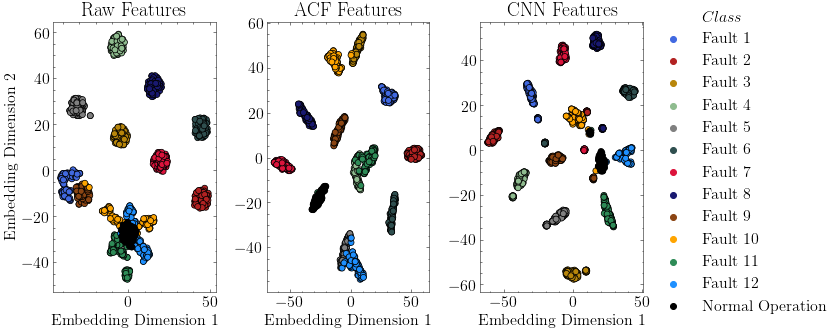

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
scatterplot(raw_emb, label_names, column_names=['Embedding Dimension 1', 'Embedding Dimension 2'],
            palette=palette, ax=axes[0], legend=False)
scatterplot(acf_emb, label_names, column_names=['Embedding Dimension 1', 'Embedding Dimension 2'],
            palette=palette, ax=axes[1], legend=False)
scatterplot(cnn_emb, label_names, column_names=['Embedding Dimension 1', 'Embedding Dimension 2'],
            palette=palette, ax=axes[2], legend='brief')
axes[0].set_title('Raw Features')
axes[1].set_title('ACF Features')
axes[2].set_title('CNN Features')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[2].legend(bbox_to_anchor=(1, 1.1))
plt.tight_layout()
plt.savefig('./Figures/Ch6/TSNEVis.pdf')